In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc


In [4]:
X = pd.read_csv('Credit Card.csv')

In [5]:
X.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
X = X.drop('CUST_ID', axis = 1)

In [7]:
X.fillna(method ='ffill', inplace = True)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
X_normalized = normalize(X_scaled)
 
X_normalized = pd.DataFrame(X_normalized)

In [9]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [19]:
X_principal.head()

,P1,P2
0,-0.489949,-0.679977
1,-0.519099,0.544825
2,0.330633,0.268882
3,-0.481656,-0.097613
4,-0.563512,-0.482505


In [30]:
a =  X_principal.copy()
a['Cluster'] = ac3.fit_predict(a)

b=a.loc[a['Cluster']==0]
b.drop('Cluster',axis=1,inplace=True)
print(b)
c=pca.inverse_transform(b)
print(c)
    

            P1        P2
2     0.330633  0.268882
5     0.336076 -0.235096
6     0.756178  0.388878
7     0.576473 -0.261945
8    -0.185032 -0.254404
...        ...       ...
8942  0.282891 -0.198581
8944 -0.103785 -0.093092
8945  0.328693 -0.198293
8946  0.259752 -0.176867
8947  0.188818 -0.248155

[4342 rows x 2 columns]
[[ 0.05809795  0.09669153  0.05801666 ...  0.00770025  0.01429429
   0.02617302]
 [-0.16662402 -0.01943516 -0.01011058 ... -0.06351162  0.05797893
   0.04788587]
 [ 0.07916778  0.14192723  0.15678024 ...  0.02238585  0.09650706
   0.02750052]
 ...
 [-0.14968297 -0.01124284 -0.00648639 ... -0.05827425  0.05327329
   0.04619398]
 [-0.1349078  -0.00913673 -0.01687719 ... -0.05488137  0.03650769
   0.04422498]
 [-0.1612461  -0.02851726 -0.04038007 ... -0.06457307  0.02712885
   0.04620482]]


C:\Users\surya\AppData\Local\Temp\ipykernel_10372\2886977702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.drop('Cluster',axis=1,inplace=True)


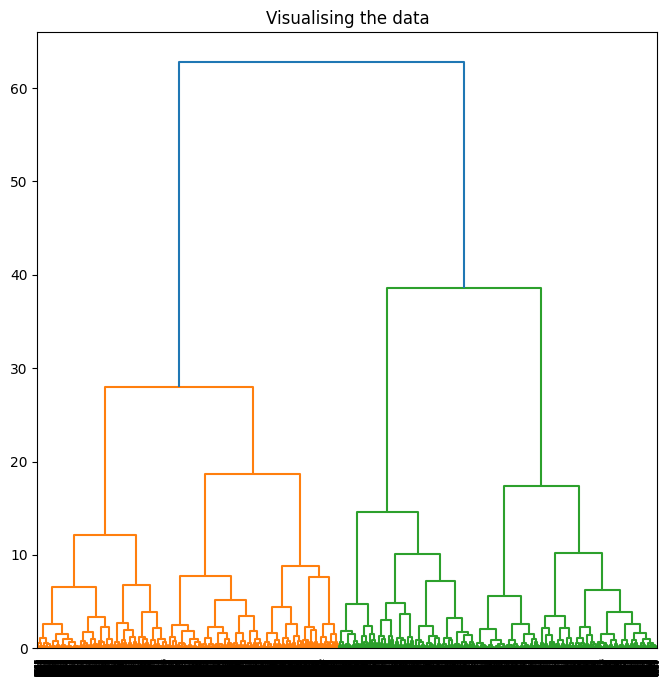

In [10]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

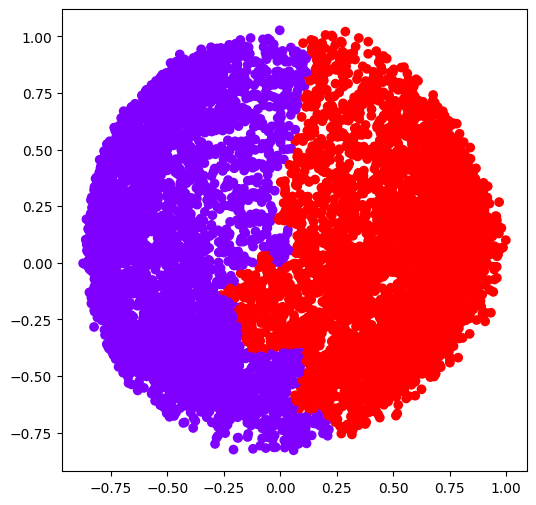

In [11]:
ac2 = AgglomerativeClustering(n_clusters = 2)
 

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

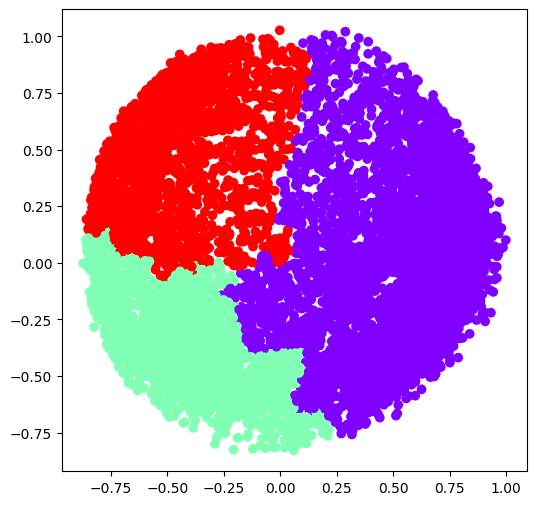

In [12]:

ac3 = AgglomerativeClustering(n_clusters = 3)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

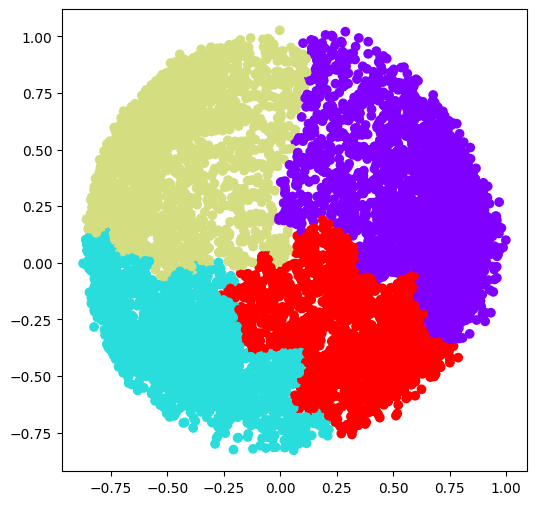

In [13]:
ac4 = AgglomerativeClustering(n_clusters = 4)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

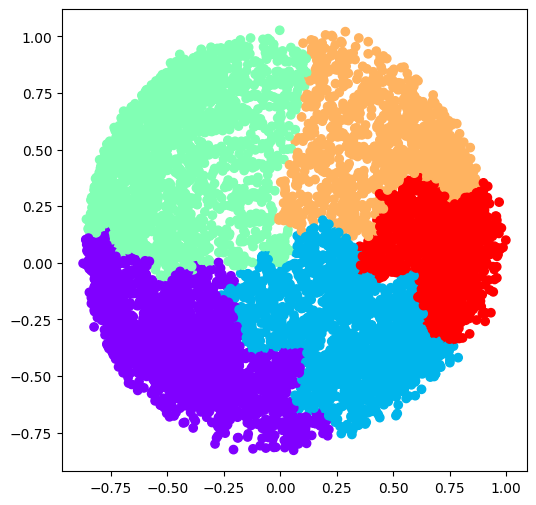

In [14]:
ac5 = AgglomerativeClustering(n_clusters = 5)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

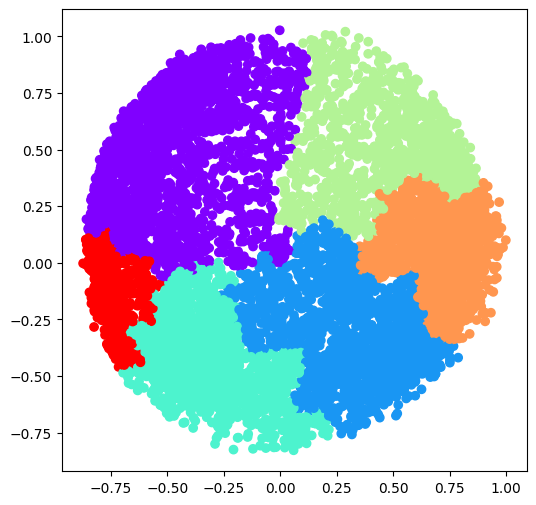

In [31]:
ac6 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

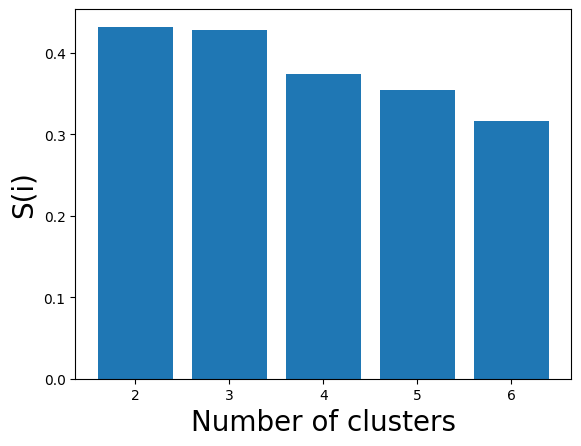

In [16]:
k = [2, 3, 4, 5, 6]
 

silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
 

plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()